# CRISP-DM for prediction of diabetes

Over the next few weeks, we'll go through a simple example of a data science process:

- business understanding (asking the right questions)
- loading data
- EDA (exploratory data analysis), visualization
- data cleaning and preparation
- modeling and evaluation
- communication of results
    
In this file, we'll cover the first three bullets above.
    
# 1. Business understanding

In this demo, we'll be working with a dataset with health and biographic data on diabetes diagoneses from [here](https://data.world/informatics-edu/diabetes-prediction). The purpose of our task is to understand which data is related to the occurance of diabetes, and to eventually predict a risk of diabetes based on the data. Our question is: can we accurately predict the occurance of diabetes based on the demographic and medical data we collect? With this, we can offer better personalized health services to people, and potentially improve the overall health of everyone by understanding what we can do to reduce the risk of diabetes.

We'll start with EDA (exploratory data analysis) - both numeric and visual.

# 2. Data understanding - EDA and visualization basics

Understanding how to create charts and plots of data is an important first step in understanding the data. In this first section, we'll cover the bare bones basics which are all you need to complete the assignments this week.

Make sure you've got the following packages installed before starting. You can install them from a terminal or command prompt with `conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl`, or you can install them in a jupyter cell with `!conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl -y`. If conda is taking too long, you can use pip instead: `!pip install pandas-profiling`. Press shift+enter to run the cells after selecting them.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

First, we load the data. `pandas` is one of the most, if not *the* most, common data loading and preparation package in Python for data science. The documentation is excellent for the package, and it can read from many filetypes. Here is the page for the `read_excel` function: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

The main class in pandas is the DataFrame, which is often stored in a variable `df`. If you are getting an error, you may need to install `openpyxl` as shown above.

In [2]:
# we can give an index number or name for our index column, or leave it blank
df = pd.read_excel('diabetes_data.xlsx', index_col='Patient number')
df

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes
Patient number,,,,,,,,,,,,,
1,193,77,49,19,female,61,119,22.5,118,70,32,38,No diabetes
2,146,79,41,19,female,60,135,26.4,108,58,33,40,No diabetes
3,217,75,54,20,female,67,187,29.3,110,72,40,45,No diabetes
4,226,97,70,20,female,64,114,19.6,122,64,31,39,No diabetes
5,164,91,67,20,female,70,141,20.2,122,86,32,39,No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,227,105,44,83,female,59,125,25.2,150,90,35,40,No diabetes
387,226,279,52,84,female,60,192,37.5,144,88,41,48,Diabetes
388,301,90,118,89,female,61,115,21.7,218,90,31,41,No diabetes


It's always a good idea to look at the top and bottom of the data to make sure everything looks ok. We can see printing out the `df` object in jupyter (by putting the df object as the last line in the cell) prints the top and bottom of the data. We can also do this with `head` and `tail`:

In [3]:
df.head()

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes
Patient number,,,,,,,,,,,,,
1,193,77,49,19,female,61,119,22.5,118,70,32,38,No diabetes
2,146,79,41,19,female,60,135,26.4,108,58,33,40,No diabetes
3,217,75,54,20,female,67,187,29.3,110,72,40,45,No diabetes
4,226,97,70,20,female,64,114,19.6,122,64,31,39,No diabetes
5,164,91,67,20,female,70,141,20.2,122,86,32,39,No diabetes


In [4]:
df.tail()

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes
Patient number,,,,,,,,,,,,,
386,227,105,44,83,female,59,125,25.2,150,90,35,40,No diabetes
387,226,279,52,84,female,60,192,37.5,144,88,41,48,Diabetes
388,301,90,118,89,female,61,115,21.7,218,90,31,41,No diabetes
389,232,184,114,91,female,61,127,24.0,170,82,35,38,Diabetes
390,165,94,69,92,female,62,217,39.7,160,82,51,51,No diabetes


## pandas-profiling auto-EDA

This generates an EDA report. There are other auto-EDA packages but pandas-profiling is a nice one. Although this can be displayed in Jupyter, it can be better to save the file as HTML then open it separately.

In [5]:
# use the argument minimal=True to speed this up, although you won't get all the plots and stats
report = ProfileReport(df)
report.to_file('diabetes_eda.html')

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Using pandas for EDA and visualization

The pandas package has a few functions for generating numeric EDA and statistics, and can easily plot data.

numeric EDA:
- info
- describe
- unique
- value_counts

plots:
- bar plots
- histograms
- scatter plots

other:
- filtering

### Numeric EDA

Info shows the datatypes (dtype), number of values, and number of missing values:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cholesterol   390 non-null    int64  
 1   Glucose       390 non-null    int64  
 2   HDL Chol      390 non-null    int64  
 3   Age           390 non-null    int64  
 4   Gender        390 non-null    object 
 5   Height        390 non-null    int64  
 6   Weight        390 non-null    int64  
 7   BMI           390 non-null    float64
 8   Systolic BP   390 non-null    int64  
 9   Diastolic BP  390 non-null    int64  
 10  waist         390 non-null    int64  
 11  hip           390 non-null    int64  
 12  Diabetes      390 non-null    object 
dtypes: float64(1), int64(10), object(2)
memory usage: 42.7+ KB


Describe shows some numeric stats on numeric columns:

In [7]:
df.describe()

,Cholesterol,Glucose,HDL Chol,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308
std,44.666005,53.798188,17.279069,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342
min,78.000000,48.000000,12.000000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000
25%,179.000000,81.000000,38.000000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000
50%,203.000000,90.000000,46.000000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000
75%,229.000000,107.750000,59.000000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000
max,443.000000,385.000000,120.000000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000


We can get the columns like so:

In [8]:
df.columns

Index(['Cholesterol', 'Glucose', 'HDL Chol', 'Age', 'Gender', 'Height',
       'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist', 'hip',
       'Diabetes'],
      dtype='object')

In [9]:
# select a column
df['Age']

Patient number
1      19
2      19
3      20
4      20
5      20
       ..
386    83
387    84
388    89
389    91
390    92
Name: Age, Length: 390, dtype: int64

In [10]:
# select a column and get the counts of each unique value
df['Age'].value_counts()

40    16
36    13
43    12
41    12
37    11
      ..
83     1
84     1
89     1
91     1
92     1
Name: Age, Length: 68, dtype: int64

In [11]:
# similar, but only gets unique values
df['Age'].unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 89, 91, 92],
      dtype=int64)

### Bar plots

<AxesSubplot:>

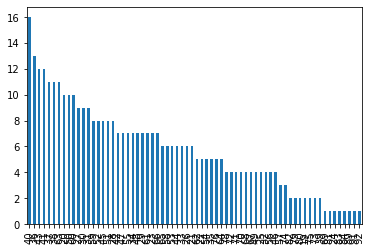

In [12]:
# turn value_counts into a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
df['Age'].value_counts().plot.bar()

In [2]:
# we can make it easier to read by restricting the number of values to the top 10
df['Age'].value_counts()[:10].plot.bar()

NameError: name 'df' is not defined

This is using the matplotlib package, so we can add axes labels and other things to the plot with matplotlib. The matlpotlib package is one of (if not *the*) oldest plotting packages in Python. For most common things, we can search the internet for it (e.g. add x-axis label) and we will usually arrive at a stack overflow page or the matplotlib documentation.

Text(0, 0.5, 'Counts')

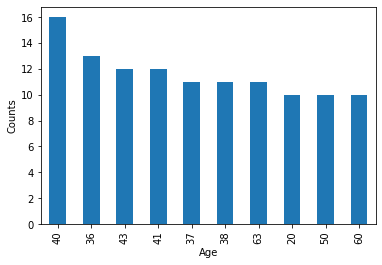

In [14]:
import matplotlib.pyplot as plt

df['Age'].value_counts()[:10].plot.bar()
plt.xlabel('Age')
plt.ylabel('Counts')

If you want to hide the printout of text, assign the last line to the _ variable (essentially, throw away the output that gets printed).

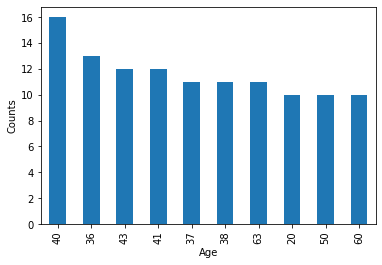

In [15]:
df['Age'].value_counts()[:10].plot.bar()
plt.xlabel('Age')
_ = plt.ylabel('Counts')

If you want to share the figure, you can right click it and copy or save the image, or you can see the example at the bottom of the notebook for saving a figure.

### Histograms

Three common types of plots we can use are bar plots (like we saw), histograms, and scatter plots. Histograms are generated by pandas-profiling, but we can also look at a particular histogram like so:

<AxesSubplot:>

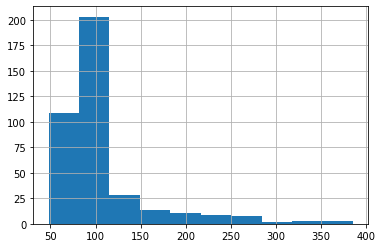

In [16]:
df['Glucose'].hist()

<AxesSubplot:ylabel='Frequency'>

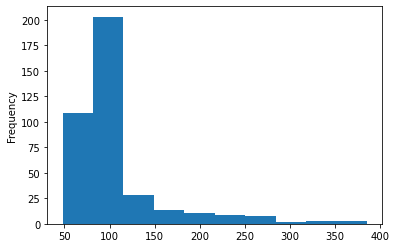

In [17]:
# this slightly different interface has a different style and generally looks better without gridlines
df['Glucose'].plot.hist()

There are many options for the function shown in the docs:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

Here, we change the number of bars (bins).

<AxesSubplot:ylabel='Frequency'>

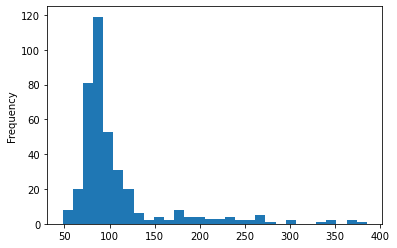

In [18]:
df['Glucose'].plot.hist(bins=30)

### Scatter plots

Scatter plots are for showing the relationship between two continuous variables, or variables that can take any value within a given range (e.g. both glucose and cholesterol can be any value above 0, but cholesterol is usually in the range 100-300).

<AxesSubplot:xlabel='Cholesterol', ylabel='Glucose'>

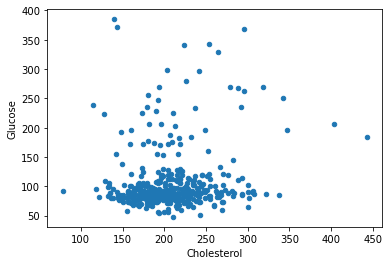

In [19]:
df.plot.scatter(x='Cholesterol', y='Glucose')

# Optional - Advanced EDA and visualization
This part is not required, but is extra for those who want to learn more. It covers:
- filtering dataframes
- plotting with seaborn
- using the phik correlation
- time series plots with pandas

### Filtering

If we want to get only certain subsets of the data, we can filter it. For example, let's get everyone over the median age. It's usually best to use copy() at the end to take a copy of the slice of the dataframe -- this avoids the settingwithcopy errors that can happen otherwise.

In [1]:
over_median_age = df[df['Age'] > df['Age'].median()].copy()

NameError: name 'df' is not defined

This uses a boolean comparison, which indexes the dataframe and returns rows where the condition is `True`.

In [21]:
df['Age'] > df['Age'].median()

Patient number
1      False
2      False
3      False
4      False
5      False
       ...  
386     True
387     True
388     True
389     True
390     True
Name: Age, Length: 390, dtype: bool

We can use the same boolean comparison operators as in most of Python and other programming, such as <, >, <=, >=, ==, and !=. We can also negate something with the ~ character:

In [22]:
~(df['Age'] > df['Age'].median())

Patient number
1       True
2       True
3       True
4       True
5       True
       ...  
386    False
387    False
388    False
389    False
390    False
Name: Age, Length: 390, dtype: bool

To combine filters, we use the & (and) and | (or) operators, and be careful to wrap each conditional filter within parentheses:

In [23]:
over_median_age_chol = df[(df['Age'] > df['Age'].median()) & (df['Cholesterol'] > df['Cholesterol'].median())].copy()

In [24]:
over_median_age_chol

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Diabetes
Patient number,,,,,,,,,,,,,
198,216,109,86,45,female,67,147,23.0,140,102,32,38,No diabetes
199,233,92,39,45,female,64,167,28.7,124,86,39,44,No diabetes
203,219,130,44,45,male,67,218,34.1,172,110,41,45,Diabetes
206,207,102,43,46,female,63,179,31.7,212,114,38,46,No diabetes
207,242,108,53,46,female,62,183,33.5,130,86,37,45,No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,255,112,34,82,male,66,163,26.3,179,89,37,43,No diabetes
386,227,105,44,83,female,59,125,25.2,150,90,35,40,No diabetes
387,226,279,52,84,female,60,192,37.5,144,88,41,48,Diabetes


We can filter to get the two groups of diabetes and no diabetes people, and then look at the proportions of the genders in the groups (since the numbers in the groups are not the same). The `shape` attribute of a dataframe is a tuple with (rows, columns), so getting the first element with `[0]` gives us the number of rows. It looks like there isn't a large difference in the balance of male/female genders between these two groups.

In [25]:
df.shape

(390, 13)

In [26]:
diabetes_df = df[df['Diabetes'] == 'Diabetes']

diabetes_df['Gender'].value_counts() / diabetes_df.shape[0]

female    0.566667
male      0.433333
Name: Gender, dtype: float64

In [27]:
no_diabetes_df = df[df['Diabetes'] == 'No diabetes']

no_diabetes_df['Gender'].value_counts() / no_diabetes_df.shape[0]

female    0.587879
male      0.412121
Name: Gender, dtype: float64

This is also what the `normalize` argument does.

In [28]:
no_diabetes_df['Gender'].value_counts(normalize=True)

female    0.587879
male      0.412121
Name: Gender, dtype: float64

## Seaborn for plotting

seaborn is a package that uses matplotlib and pandas dataframes to create more complex plots with minimal effort. In our case, we can group our data by people with and without diabetes, and plot some of their characterists. We are also going to use the phik package for correlations, so we need to install both these packages first:

In [29]:
!conda install -c conda-forge seaborn phik -y

Solving environment: ...working... done

# All requested packages already installed.



Setting `stat='density'` and `common_norm=True` normalizes area under the individual histograms so they equal 1.
This makes it easier to compare the two groups. We can see that people with diabetes tend to have much higher glucose levels:

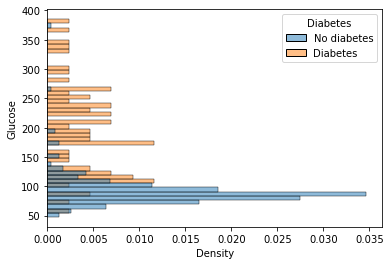

In [30]:
import phik
import seaborn as sns

_ = sns.histplot(data=df, y='Glucose', hue='Diabetes', stat='density', common_norm=False)

With seaborn, we can create scatter plots and color them by groups:

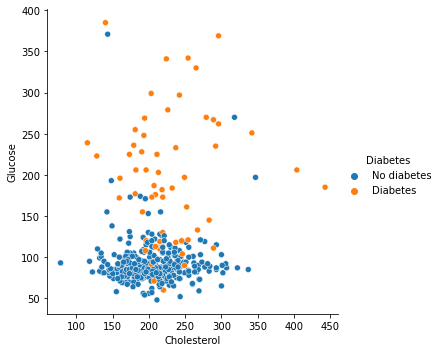

In [31]:
sns.relplot(data=df, x='Cholesterol', y='Glucose', hue='Diabetes')

One other nice plot to examine is a correlogram. This shows the linear correlations between columns. We can see the pairs BMI and weight as well as waist and hip measurements are strongly correlated with each other. This is the Pearson correlation, which shows linear relationships between two numeric columns. For more advanced correlations, try the Phi-k correlation package: https://phik.readthedocs.io/en/latest/

<AxesSubplot:>

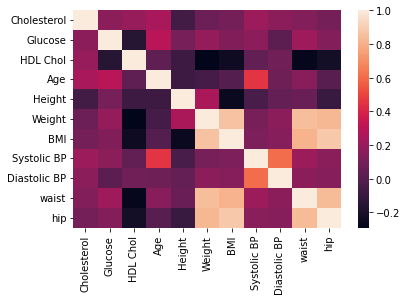

In [32]:
sns.heatmap(df.corr())

interval columns not set, guessing: ['Cholesterol', 'Glucose', 'HDL Chol', 'Age', 'Height', 'Weight', 'BMI', 'Systolic BP', 'Diastolic BP', 'waist', 'hip']


<AxesSubplot:>

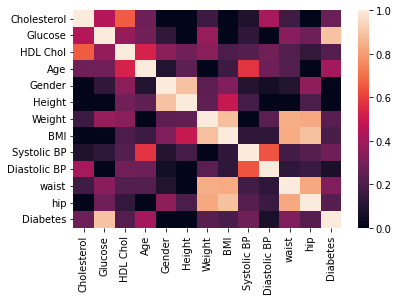

In [33]:
sns.heatmap(df.phik_matrix())

One last note: the `countplot` in seaborn is very much like doing `df['column'].value_counts().plot.bar()`, but allows us to use the `hue` argument to group data by a categorical variable.

## Time series plots

Time series plots are a little different, since we'll often be using the x-axis as sequential time. With pandas, as long as our timestamp is a timestamp datatype and our dataframe index, we can easily plot timeseries data. We'll be using data from here: https://www.kaggle.com/selfishgene/historical-hourly-weather-data?select=temperature.csv

In [34]:
time_df = pd.read_csv('temperature.csv', index_col='datetime', parse_dates=['datetime'], infer_datetime_format=True)
time_df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# we can see the index is of type "DatetimeIndex"
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vancouver          44458 non-null  float64
 1   Portland           45252 non-null  float64
 2   San Francisco      44460 non-null  float64
 3   Seattle            45250 non-null  float64
 4   Los Angeles        45250 non-null  float64
 5   San Diego          45252 non-null  float64
 6   Las Vegas          45252 non-null  float64
 7   Phoenix            45250 non-null  float64
 8   Albuquerque        45252 non-null  float64
 9   Denver             45252 non-null  float64
 10  San Antonio        45252 non-null  float64
 11  Dallas             45249 non-null  float64
 12  Houston            45250 non-null  float64
 13  Kansas City        45252 non-null  float64
 14  Minneapolis        45240 non-null  float64
 15  Saint Louis        45252 non-null  

We could also get our data in a proper format using `pd.to_datetime()`:

In [36]:
time_df2 = pd.read_csv('temperature.csv')
time_df2['datetime'] = pd.to_datetime(time_df2['datetime'])
time_df2.set_index('datetime', inplace=True)

In [37]:
time_df2

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='datetime'>

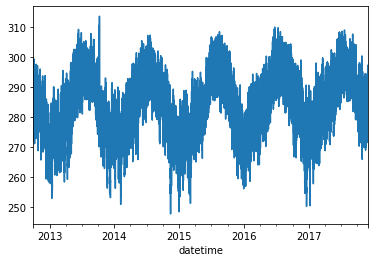

In [38]:
time_df['Denver'].plot()

One last trick we'll learn with datetime data is we can *resample* it, meaning change the time increments. We can convert our data to monthly data like so. We need to provide a transformation for the data, like 'mean' to take the average.

In [39]:
time_df_months = time_df.resample('1M').mean()

<AxesSubplot:xlabel='datetime'>

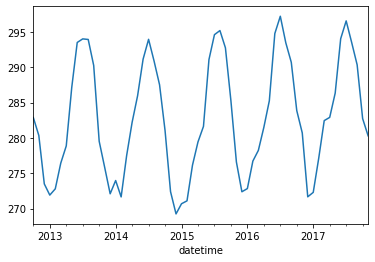

In [40]:
time_df_months['Denver'].plot()

If you want to remove missing values, dropna works:

In [41]:
time_df.shape

(45253, 36)

In [42]:
time_df.dropna(inplace=True)
time_df.shape

(44430, 36)

### Saving a plot

Saving a plot allows you to get higher resolution and control the size of the plot. In general, we want to first create the figure object with our specified size, then create our figure, then use plt.tight_layout, then save the figure. Remember `plt` is matplotlib which we imported earlier. Here is a respectable figure showing the temperature in Denver over the years. `dpi` is dots per inch. A higher value means higher resolution and bigger filesize. 300 can work well.

Notice we also convert the units from Kelvin to Farenheight and add reasonable x- and y-labels so that the plot is easily understood. Making a good plot requires this effort.

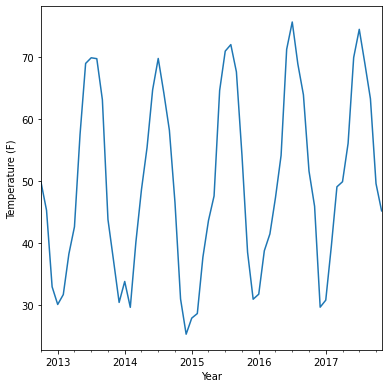

In [43]:
time_df_months['Denver_F'] = 9 / 5 * (time_df_months['Denver'] - 273) + 32

f = plt.figure(figsize=(5.5, 5.5))
time_df_months['Denver_F'].plot()
plt.xlabel('Year')
plt.ylabel('Temperature (F)')
plt.tight_layout()  # auto-adjust margins
plt.savefig('denver_temps.jpg', dpi=300)

## Further resources

The pandas documentation is excellent and shows how to create plots: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

Seaborn also has a gallery with examples: https://seaborn.pydata.org/examples/index.html

Kaggle has a short course on Python visualization: https://www.kaggle.com/learn/overview